### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [10]:
import pandas as pd

df = pd.read_csv('data/ecommerce_sales_data.csv')
df.set_index('OrderID', inplace=True)

# 데이터 로드(인덱스: OrderID)
df = pd.read_csv('data/ecommerce_sales_data.csv', index_col='OrderID')

# 1. 상위 5개 행 출력
print("상위 5개 데이터:")
print(df.head())
print()

# 2. 결측값 확인 및 처리
print("각 열별 결측값 개수:")
print(df.isnull().sum())
print()

missing_cols = df.columns[df.isnull().any()]
for col in missing_cols:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna('Unknown', inplace=True)

print("결측값 처리 후 검증:")
print(df.isnull().sum())
print()

# 3. 데이터 타입 확인 + OrderDate 변환
print("열별 데이터 타입(변환 전):")
print(df.dtypes)
print()

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print("열별 데이터 타입(변환 후):")
print(df.dtypes)
print()




상위 5개 데이터:
        Product     Category  Quantity  Price  CustomerID   Birthdate  \
OrderID                                                                 
1           역사책        Books         5  37000        1071  1980-08-08   
2            셔츠     Clothing         5  20000        1526  1967-08-09   
3           노트북  Electronics         4   8000        1252  1973-04-07   
4           자전거       Sports         1   8000        1670  1970-04-08   
5           헤드폰  Electronics         3  26000        1838  1992-05-19   

                OrderDate Country  DiscountRate  
OrderID                                          
1        2024-06-10 17:18      미국          0.14  
2        2023-11-18 18:45      독일          0.29  
3        2023-10-15 11:19      중국          0.23  
4         2024-07-19 2:19      일본          0.20  
5        2024-01-20 20:34    대한민국          0.09  

각 열별 결측값 개수:
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
Order

C:\Users\75050\AppData\Local\Temp\ipykernel_14824\368581834.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\75050\AppData\Local\Temp\ipykernel_14824\3784124411.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M', on='OrderDate')['TotalRevenue'].sum()


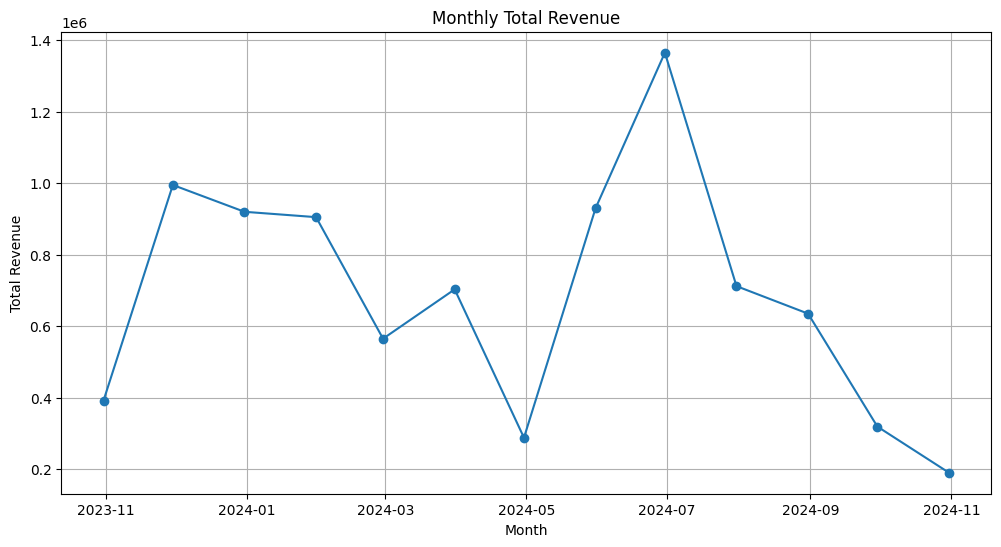

카테고리별 매출액 Top 3:
Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64
국가별 매출액 Top 5:
Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


In [14]:
# 1. 매출액 컬럼 생성
import matplotlib.pyplot as plt

df['TotalRevenue'] = df['Quantity'] * df['Price']

# 2. 월별 매출액 시각화
monthly_revenue = df.resample('M', on='OrderDate')['TotalRevenue'].sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# 3. 카테고리 Top3
top3_categories = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)
print("카테고리별 매출액 Top 3:")
print(top3_categories)

# 4. 국가별 Top5
top5_countries = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print("국가별 매출액 Top 5:")
print(top5_countries)


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.